# Run the whole deltas algorithm

In [7]:
%load_ext autoreload
%autoreload 2

from deltas.pipeline import data, classifier, evaluation
from deltas.model import SSL

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [8]:
N1 = 9990
N2 = 10
data_clf = data.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


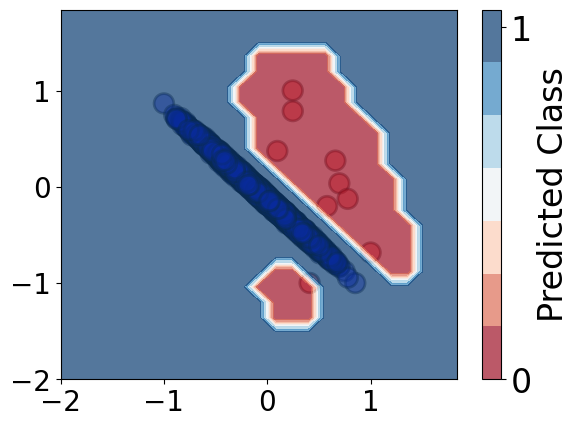

SMOTE


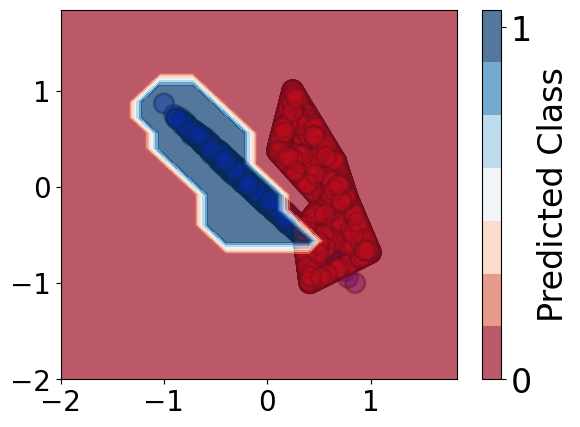

In [9]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=False)
data_clf['clf'] = classifiers_dict['Baseline']                      

## Fit deltas

Original Data


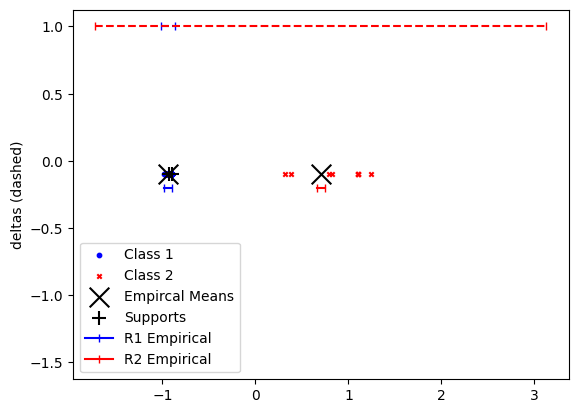

Unable to find result with SSL, increase the max_trials


In [10]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_model = SSL.SSL_deltas(
    clf,
).fit(X, y, _print=True, _plot=True, max_trials=100000, parallel=True)

## Show parameters

In [11]:
deltas_model.print_params()
deltas_model.print_deltas()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
original accuracy: 0.80275
SMOTE accuracy: 0.95455
deltas accuracy: 0.80275

original F1: 0.7542821550918717
SMOTE F1: 0.953161230483846
deltas F1: 0.7542821550918717

original precision0: 0.7171029042667623
SMOTE precision0: 0.9291041253658076
deltas precision0: 0.7171029042667623

original precision1: 1.0
SMOTE precision1: 0.9832039970234931
deltas precision1: 1.0

original


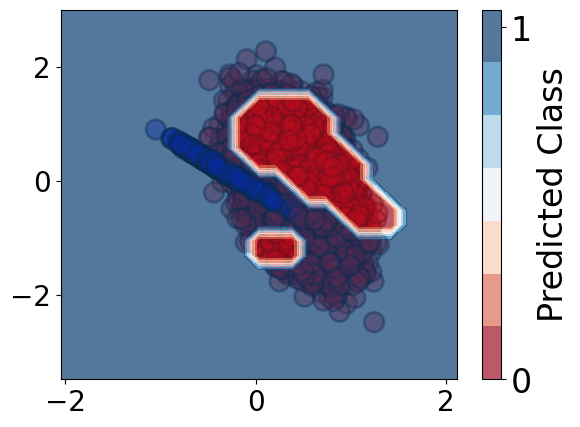

SMOTE


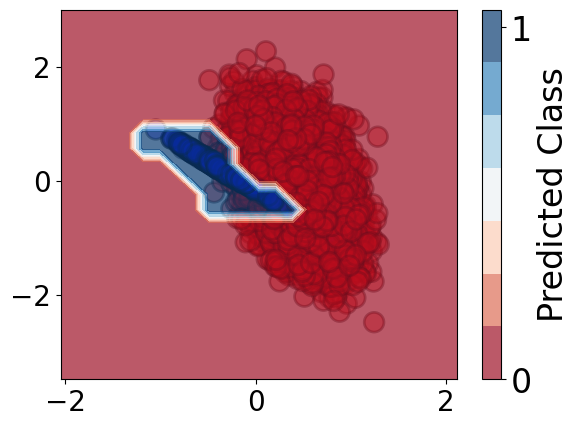

deltas
Not fit to any data yet, call 'fit(X, y)' or  method first


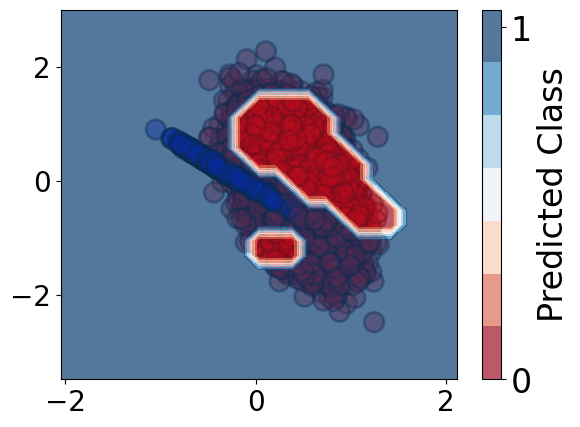

Giving bias from original classifier


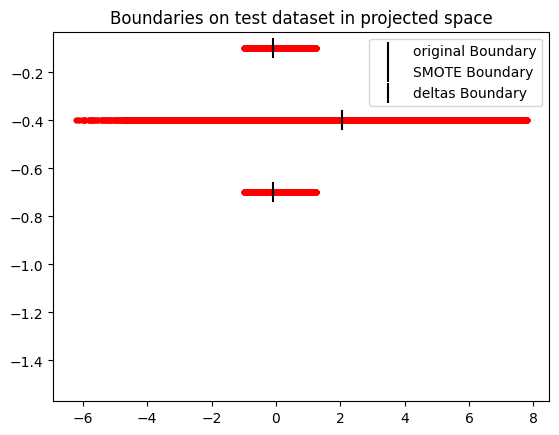

In [12]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)